In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import preprocessing
from scipy.stats import skew

In [2]:
dfcleaned = pd.read_csv("../../../Data/COSMIC_1/vw_Incident1_cleaned.csv", encoding='latin-1')
tt = dfcleaned.TimeTaken
print(tt[:5])
tt.describe()

0    1131077.0
1     447459.0
2      25474.0
3     777526.0
4     622610.0
Name: TimeTaken, dtype: float64


count    8.624000e+03
mean     5.497068e+05
std      5.306705e+05
min      2.900000e+02
25%      1.092372e+05
50%      3.832805e+05
75%      8.364850e+05
max      2.614280e+06
Name: TimeTaken, dtype: float64

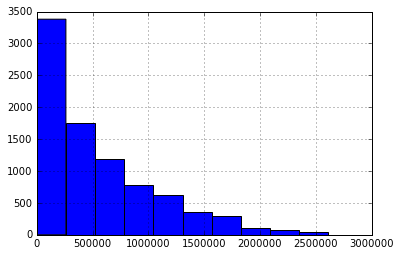

In [101]:
tt.hist()
plt.show()

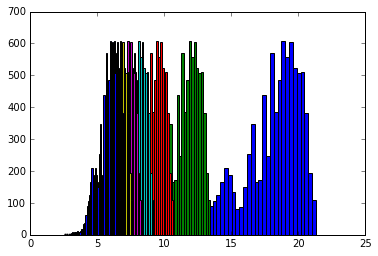

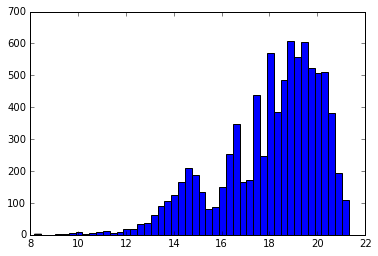

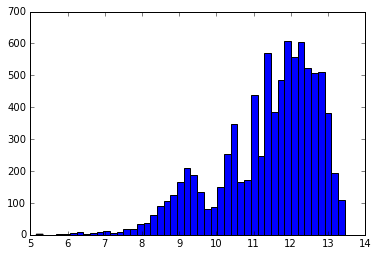

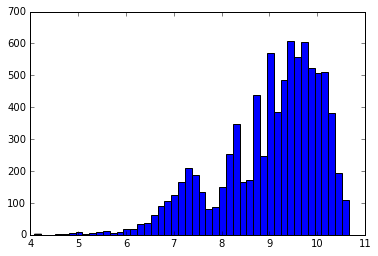

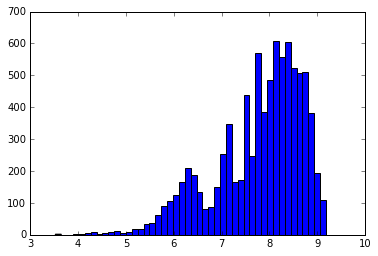

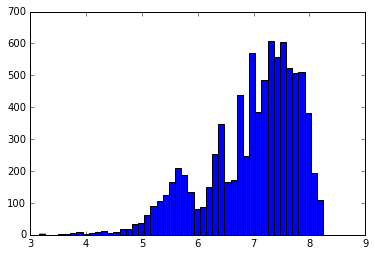

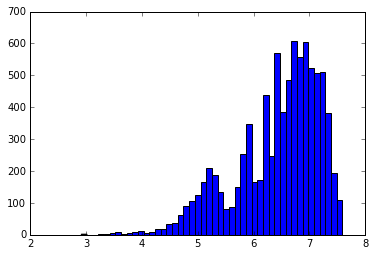

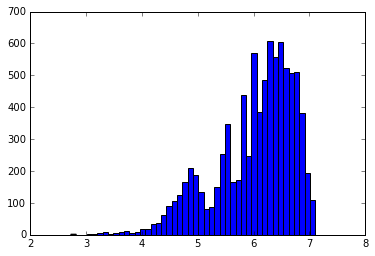

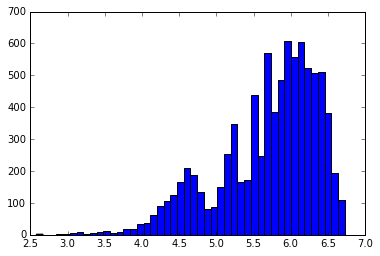

In [18]:
for i in range(2,10):
    plt.hist(np.log(tt)/np.log(i), bins='auto')
plt.show()
for i in range(2,10):
    plt.hist(np.log(tt)/np.log(i), bins='auto')
    plt.show()

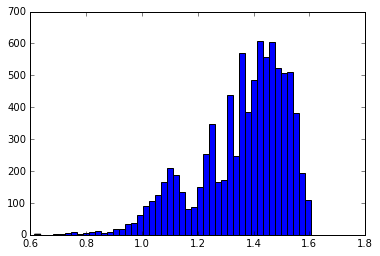

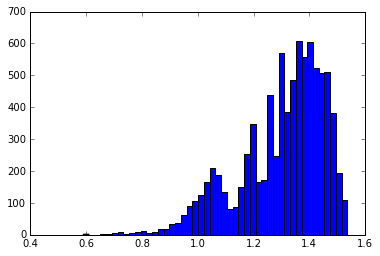

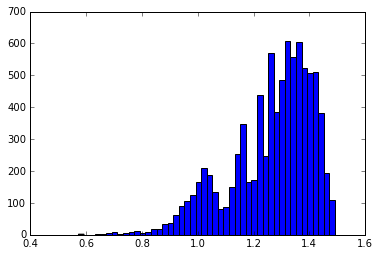

In [24]:
for i in range(2,5):
    i*=5000
    plt.hist(np.log(tt)/np.log(i), bins='auto')
    plt.show()

# So changing the base does nothing to the shape of the distribution

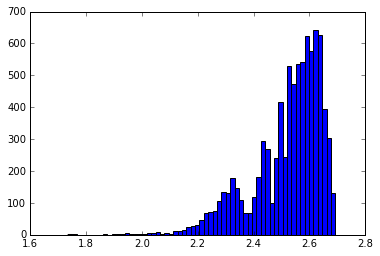

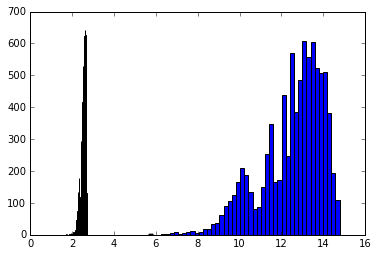

In [27]:
plt.hist(np.log(np.log(tt)), bins='auto')
plt.show()

plt.hist(np.log(tt), bins='auto')
plt.hist(np.log(np.log(tt)), bins='auto')
plt.show()

# The log of the log doesn't change the shape of the distribution, it just makes the range of values smaller

Skewness: 0.31


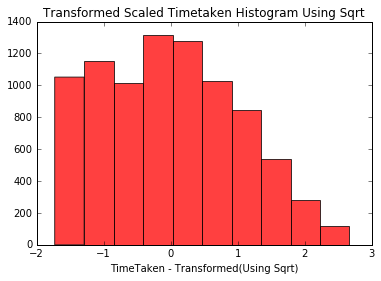

Skewness: 1.22


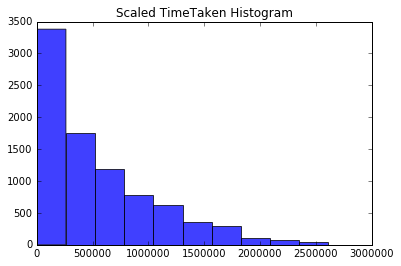

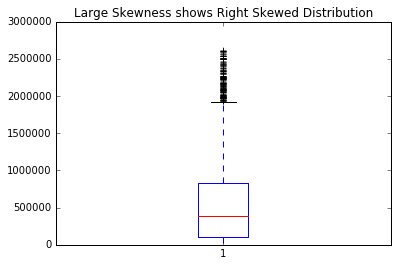

In [108]:
from sklearn import preprocessing
from scipy.stats import skew

#Note that we changed the following line to process the square roots instead of actuals
ttsqrt = preprocessing.scale(np.sqrt(tt)) 
ttscaled = preprocessing.scale(tt) 

#Next We calculate Skewness using skew in spicy.stats
skness_scale_sqrt = skew(ttsqrt)
skness_scale= skew(ttscaled)

#We draw the histograms 
# figure = plt.figure()
# figure.add_subplot(131)   
plt.hist(ttsqrt,facecolor='red',alpha=0.75) 
plt.xlabel("TimeTaken - Transformed(Using Sqrt)") 
plt.title("Transformed Scaled Timetaken Histogram Using Sqrt") 
print("Skewness: {0:.2f}".format(skness_scale_sqrt)) 
plt.show()

# skness = skew(ttscaled)
#We draw the histograms 
plt.hist(tt,facecolor='blue',alpha=0.75) 
plt.title("Scaled TimeTaken Histogram") 
print("Skewness: {0:.2f}".format(skness_scale)) 
plt.show()

plt.boxplot(tt)
plt.title("Large Skewness shows Right Skewed Distribution")
plt.show()

# So taking the sqrt of Timetaken, and then using sklearn.preprocessing.scale seems to remove the skewness

1.2232162675508884


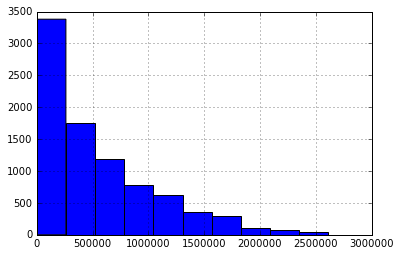

-0.9395107869388165


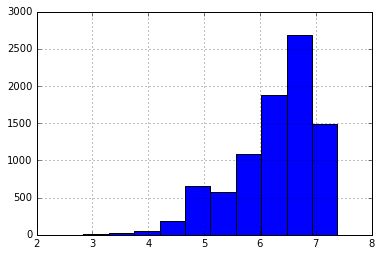

-1.0996504599582826


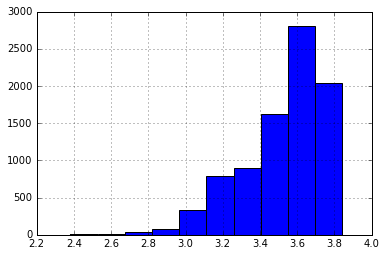

In [112]:
tt.hist()
print(skew(tt))
plt.show()

ttlogsqrt = np.log(np.sqrt(tt)) 
ttlogsqrt.hist()
print(skew(ttlogsqrt))
plt.show()

ttlogsqrt = np.sqrt(np.log(tt)) 
ttlogsqrt.hist()
print(skew(ttlogsqrt))
plt.show()

In [30]:
scaler = preprocessing.StandardScaler() 
ttnump = np.array(tt)
print(ttnump)
ttscaled = scaler.fit_transform(np.sqrt(tt)) 
print(ttscaled)
ttback = (scaler.inverse_transform(ttscaled))**2
print(ttback)

[ 1131077.   447459.    25474. ...,  1293791.   336705.   367355.]
[ 1.14825637  0.06234883 -1.33926311 ...,  1.35170252 -0.18164051
 -0.11054334]
[ 1131077.   447459.    25474. ...,  1293791.   336705.   367355.]


C:\Users\Kieron\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Kieron\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


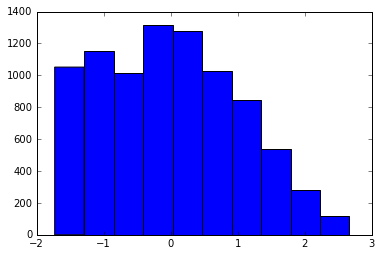

In [32]:
plt.hist(ttscaled)
plt.show()

In [95]:
# # from scipy import stats
# # tt1, _ = stats.boxcox(tt)

# from scipy.stats import norm
# df = pd.DataFrame(np.random.rand(1000), columns=['Uniform'])
# df['Normal'] = norm.ppf((df.Uniform.rank() - .5) / len(df))
# df.plot(kind='kde')